# Fixed-iteration Method

#### Initiallizing : Clear all global variables if there are remaining variables in the previous work

In [88]:
# Initiallizing : Clear all global variables if there are remaining variables in the previous work
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]

#### Import modules

In [89]:
# Import modules
import os, sys, time, numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy as sp, scipy.optimize as opt

### About a function to find a root

#### function 1 : $x^2 - 4x - lnx$
Interval 1 : $[1; 2]$ <br>
Inverval 2 : $[2; 4]$

root 1 = 1.412391172025309, root 2 = 3.057103549994281


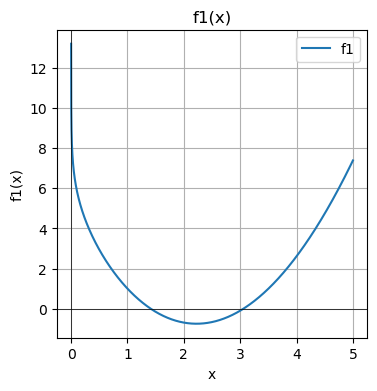

In [90]:
f1 = lambda x : np.power(x, 2) - 4*x + 4 - np.log(x)

############## Roots of function 1 ##############
interval_f1_1 = [1, 2]
interval_f1_2 = [2, 4]

r_interval_f1_1 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_1)
r_f1_1 = r_interval_f1_1.root

r_interval_f1_2 = opt.root_scalar(f=f1, method='bisect', bracket=interval_f1_2)
r_f1_2 = r_interval_f1_2.root

print(f'root 1 = {r_f1_1}, root 2 = {r_f1_2}')

############## Plot function 1 ##############
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 5+.0001, .0001)
y = f1(x)
axes.plot(x, y, label='f1')
axes.set_title('f1(x)')
axes.set_xlabel('x')
axes.set_ylabel('f1(x)')
axes.legend()
axes.axhline(y=0, linewidth=0.5, color='k')
axes.axvline(x=0, linewidth=0.5, color='k')
axes.grid()

#### function 2 : $x + 1 - 2sin(pi*x)$
interval 1 : $[0; 0.5]$ <br>
interval 2 : $[0.5; 1]$

root 1 = 0.20603511957051523, root 2 = 0.6819748087382322


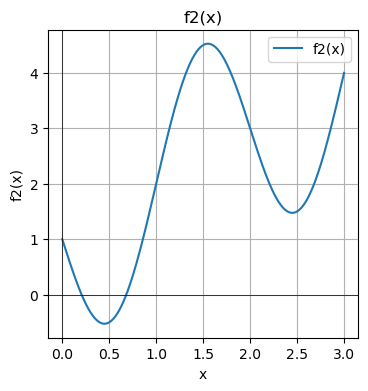

In [91]:
f2 = lambda x : x + 1 - 2*np.sin(np.pi*x)

############## Roots of function 2 ##############
interval_f2_1 = [0, .5]; x0_f2_1 = interval_f2_1[0]
interval_f2_2 = [.5, 1]; x0_f2_2 = interval_f2_2[0]

r_interval_f2_1 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_1)
r_f2_1 = r_interval_f2_1.root

r_interval_f2_2 = opt.root_scalar(f=f2, method='bisect', bracket=interval_f2_2)
r_f2_2 = r_interval_f2_2.root

print(f'root 1 = {r_f2_1}, root 2 = {r_f2_2}')

############## Plot of function 2 ##############
figures1, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
x = np.arange(.0001, 3+.0001, .0001)
y = f2(x)
axes1.plot(x, y, label='f2(x)')
axes1.set_title('f2(x)')
axes1.set_xlabel('x')
axes1.set_ylabel('f2(x)')
axes1.legend()
axes1.axhline(y=0, linewidth=.5, color='k')
axes1.axvline(x=0, linewidth=.5, color='k')
axes1.grid()

#### Method Test

In [92]:
# tol = 1e-5

# r0 = interval[0]
# r_new = r0
# k = 0
# err = np.abs(interval[1] - interval[0])
# g = lambda x : f(x) + x
# while err > tol:
#     k = k + 1
#     r_old = r_new
#     r_new = g(r_old)
#     err = np.abs(r_new - r_old)
#     if err < tol:
#         print(f"Converged By Tolerance. {k:d}-th iteration / |r_new - r_old| = {err:.6f} / r = {r_new:.6f} / f(r) = {f(r_new):.6f}")
#         break
#     else:
#         print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

#### Define a method

In [93]:
def fixed_point(func, r0, tol):
    g = lambda x : func(x) + x
    r_new = r0
    k = 0
    err = 1
    list_k, list_r, list_f = [k], [r0], [func(r0)]
    while err > tol:
        k = k + 1; list_k.append(k)
        r_old = r_new
        r_new = g(r_old); list_r.append(r_new); list_f.append(func(r_new))
        err = np.abs(r_new - r_old)
        if err < tol:
            print(f"Converged By Tolerance. {k:d}-th iteration / r = {r_new:.6f} / f(r) = {f(r_new):.6f} / |r_new - r_old| = {err:.6f}")
            return r_new, np.array(list_k), np.array(list_r), np.array(list_f)
        else:
            print(f"At {k:d}-th iteration : r_new is {r_new:.6f} and the |r_new - r_old| is {err:.6f}")

#### Method implementation

##### Root를 찾을 function 및 구간 먼저 선정

In [94]:
######### function / interval setting #########
idx_case = 2
if idx_case == 1:
    f = f1
    a0 = interval_f1_1[0]
    b0 = interval_f1_1[1]
    r = r_f1_1
elif idx_case == 2:
    f = f1
    a0 = interval_f1_2[0]
    b0 = interval_f1_2[1]
    r = r_f1_2
elif idx_case == 3:
    f = f2
    a0 = interval_f2_1[0]
    b0 = interval_f2_1[1]
    r = r_f2_1
else:
    f = f2
    a0 = interval_f2_2[0]
    b0 = interval_f2_2[1]
    r = r_f2_2

#### function 및 구간 선정 후 method로 root finding

In [95]:
result = fixed_point(func=f, r0=a0, tol=1e-5)
result

At 1-th iteration : r_new is 1.306853 and the |r_new - r_old| is 0.693147
At 2-th iteration : r_new is 1.519684 and the |r_new - r_old| is 0.212831
At 3-th iteration : r_new is 1.331885 and the |r_new - r_old| is 0.187799
At 4-th iteration : r_new is 1.491667 and the |r_new - r_old| is 0.159782
At 5-th iteration : r_new is 1.350175 and the |r_new - r_old| is 0.141492
At 6-th iteration : r_new is 1.472213 and the |r_new - r_old| is 0.122039
At 7-th iteration : r_new is 1.364005 and the |r_new - r_old| is 0.108208
At 8-th iteration : r_new is 1.458069 and the |r_new - r_old| is 0.094064
At 9-th iteration : r_new is 1.374645 and the |r_new - r_old| is 0.083424
At 10-th iteration : r_new is 1.447518 and the |r_new - r_old| is 0.072873
At 11-th iteration : r_new is 1.382904 and the |r_new - r_old| is 0.064615
At 12-th iteration : r_new is 1.439526 and the |r_new - r_old| is 0.056622
At 13-th iteration : r_new is 1.389343 and the |r_new - r_old| is 0.050183
At 14-th iteration : r_new is 1.43

(np.float64(1.4123956136099856),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 array([2.        , 1.30685282, 1.51968401, 1.33188503, 1.49166739,
        1.35017489, 1.47221343, 1.36400509, 1.45806933, 1.374645  ,
        1.44751836, 1.38290371, 1.43952612, 1.38934312, 1.43341389,
        1.39437478, 1.42871056, 1.39830985, 1.42507663, 1.40138793,
        1.42226122, 1.4037953 , 1.42007584, 1.40567759, 1.41837726,
        1.40714883, 1.41705579, 1.40829841, 1.41602701, 1.40919639,
        1.41522569, 1.40989767, 1.4146013 , 1.41044521, 1.41411465,
        1.41087264, 1.41373528, 1.41120627, 1.41343948, 1.41146664,
        1.41320882, 1.41166983, 1.41302894, 1.411

#### Error = r* - r

In [96]:
r_sequence = result[2]
err = np.abs(r_sequence - r)
err

array([1.05710355, 1.75025073, 1.53741954, 1.72521852, 1.56543616,
       1.70692866, 1.58489012, 1.69309846, 1.59903422, 1.68245855,
       1.60958519, 1.67419984, 1.61757743, 1.66776043, 1.62368966,
       1.66272877, 1.62839299, 1.6587937 , 1.63202692, 1.65571562,
       1.63484233, 1.65330825, 1.63702771, 1.65142596, 1.63872629,
       1.64995472, 1.64004776, 1.64880514, 1.64107654, 1.64790716,
       1.64187786, 1.64720588, 1.64250225, 1.64665834, 1.6429889 ,
       1.64623091, 1.64336827, 1.64589728, 1.64366407, 1.64563691,
       1.64389473, 1.64543372, 1.64407461, 1.64527517, 1.64421491,
       1.64515145, 1.64432433, 1.64505493, 1.64440968, 1.64497962,
       1.64447625, 1.64492086, 1.64452818, 1.64487502, 1.64456869,
       1.64483926, 1.64460029, 1.64481136, 1.64462494, 1.6447896 ,
       1.64464417, 1.64477262, 1.64465917, 1.64475937, 1.64467087,
       1.64474904, 1.64468   , 1.64474098, 1.64468712, 1.64473469,
       1.64469267, 1.64472978, 1.644697  , 1.64472596, 1.64470

#### Error vs Iteration Plot
Fixed-point method는 함수 특성에 따라서 f(x) = 0이 되는 점을 아무리 initial point를 바꿔서 시도해도 못 찾을 수 있음.

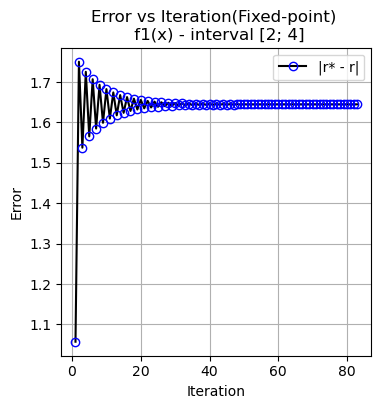

In [97]:
figures, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.plot(np.arange(len(r_sequence))+1, err, 'o-', markerfacecolor='none', markeredgecolor='blue', color='black', label='|r* - r|')
axes.set_title(f'Error vs Iteration(Fixed-point) \n f{idx_case//3 + 1}(x) - interval [{a0}; {b0}]')
axes.set_xlabel('Iteration')
axes.set_ylabel('Error')
axes.legend()
axes.grid()